In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the datasets
df1 = pd.read_csv('data/student/engagement/Student Engagement Level-Multiclass.csv')
df2 = pd.read_csv('data/student/performance/Student Performance Prediction-Multi.csv')
merged_df = pd.merge(df1, df2, on='Student ID')

# Convert binary indicator variables to categorical data type
binary_indicators = ['Assignment 1 lateness indicator', 'Assignment 2 lateness indicator', 'Assignment 3 lateness indicator']
merged_df[binary_indicators] = merged_df[binary_indicators].astype('category')

In [4]:
print(len(merged_df))
print(merged_df.columns)

486
Index(['Student ID', '# Logins', '# Content Reads', '# Forum Reads',
       '# Forum Posts', '# Quiz Reviews before submission',
       'Assignment 1 lateness indicator', 'Assignment 2 lateness indicator',
       'Assignment 3 lateness indicator',
       'Assignment 1 duration to submit (in hours)',
       'Assignment 2 duration to submit (in hours)',
       'Assignment 3 duration to submit (in hours)',
       'Average time to submit assignment (in hours)', 'Engagement Level',
       'Quiz01 [10]', 'Assignment01 [8]', 'Midterm Exam [20]',
       'Assignment02 [12]', 'Assignment03 [25]', 'Final Exam [35]',
       'Course Grade', 'Total [100]', 'Class'],
      dtype='object')


In [5]:
print(merged_df.dtypes)

Student ID                                        object
# Logins                                           int64
# Content Reads                                    int64
# Forum Reads                                      int64
# Forum Posts                                      int64
# Quiz Reviews before submission                   int64
Assignment 1 lateness indicator                 category
Assignment 2 lateness indicator                 category
Assignment 3 lateness indicator                 category
Assignment 1 duration to submit (in hours)       float64
Assignment 2 duration to submit (in hours)       float64
Assignment 3 duration to submit (in hours)       float64
Average time to submit assignment (in hours)     float64
Engagement Level                                  object
Quiz01 [10]                                        int64
Assignment01 [8]                                   int64
Midterm Exam [20]                                  int64
Assignment02 [12]              

In [6]:
# Check for missing values
print(merged_df.isnull().sum())

Student ID                                      0
# Logins                                        0
# Content Reads                                 0
# Forum Reads                                   0
# Forum Posts                                   0
# Quiz Reviews before submission                0
Assignment 1 lateness indicator                 0
Assignment 2 lateness indicator                 0
Assignment 3 lateness indicator                 0
Assignment 1 duration to submit (in hours)      0
Assignment 2 duration to submit (in hours)      0
Assignment 3 duration to submit (in hours)      0
Average time to submit assignment (in hours)    0
Engagement Level                                0
Quiz01 [10]                                     0
Assignment01 [8]                                0
Midterm Exam [20]                               0
Assignment02 [12]                               0
Assignment03 [25]                               0
Final Exam [35]                                 0


In [31]:
# 'Course Grade' is the grade counted for a curve, we will use 'Total [100]' for this project
numeric_features = ['# Logins', '# Content Reads', '# Forum Reads', '# Forum Posts', '# Quiz Reviews before submission',
                    'Assignment 1 duration to submit (in hours)', 'Assignment 2 duration to submit (in hours)',
                    'Assignment 3 duration to submit (in hours)', 'Average time to submit assignment (in hours)',
                    'Quiz01 [10]', 'Assignment01 [8]', 'Midterm Exam [20]', 'Assignment02 [12]',
                    'Assignment03 [25]', 'Final Exam [35]']
full_numeric = numeric_features + ['Total [100]']


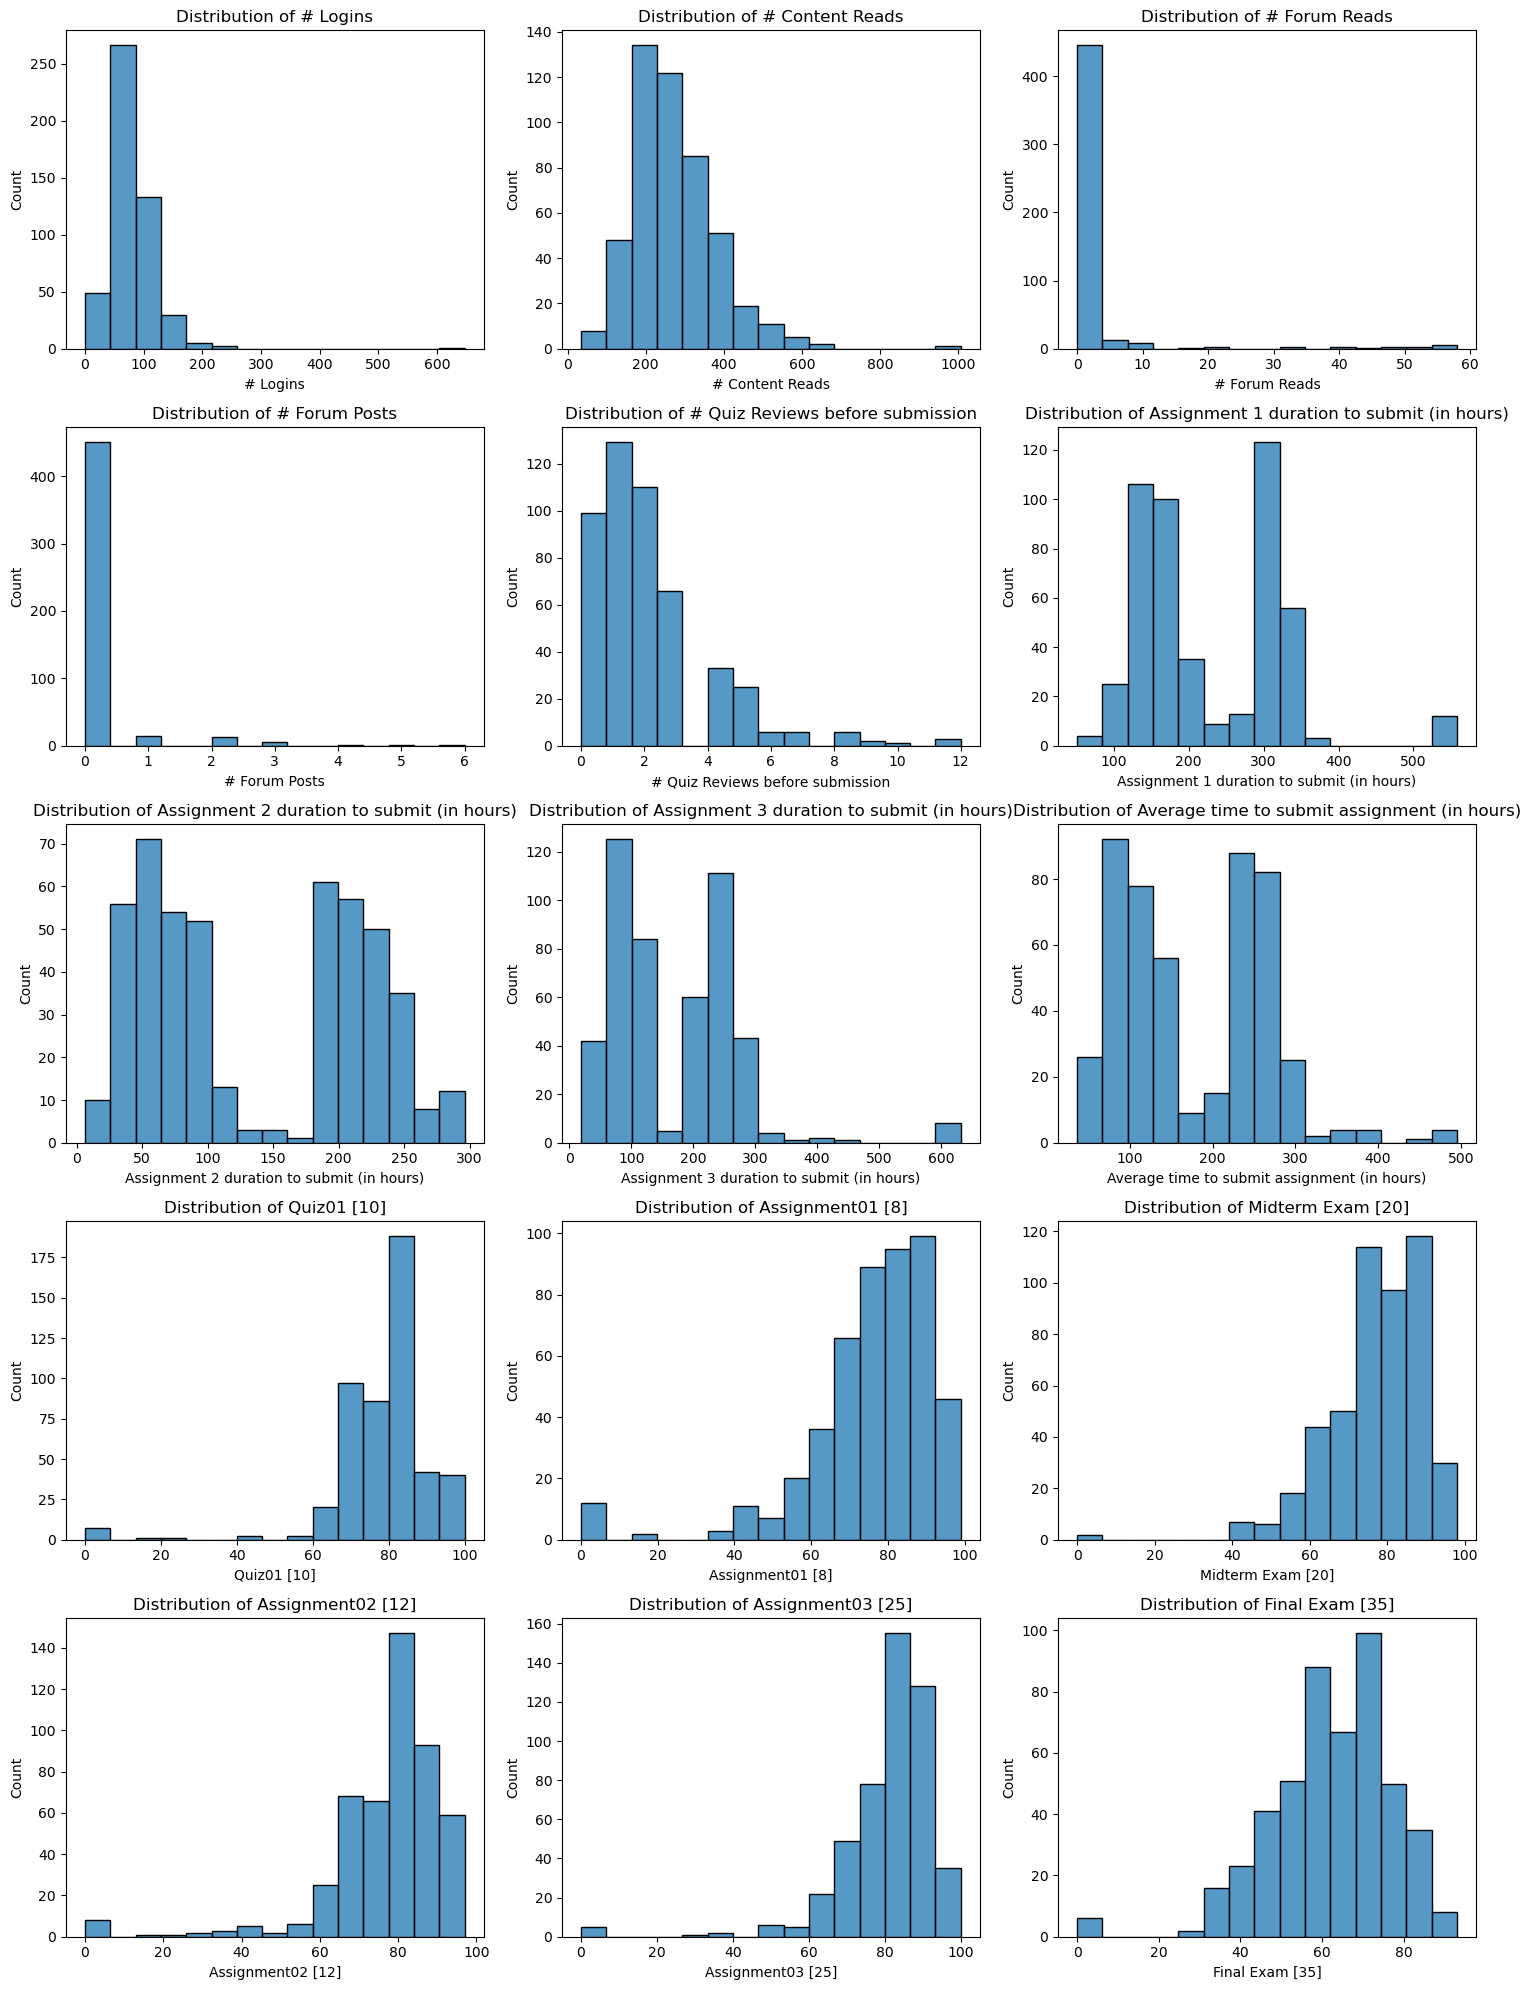

In [8]:
# Distribution of numeric features
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 20))
axes = axes.flatten()
for i, feature in enumerate(numeric_features):
    sns.histplot(merged_df[feature], bins=15, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

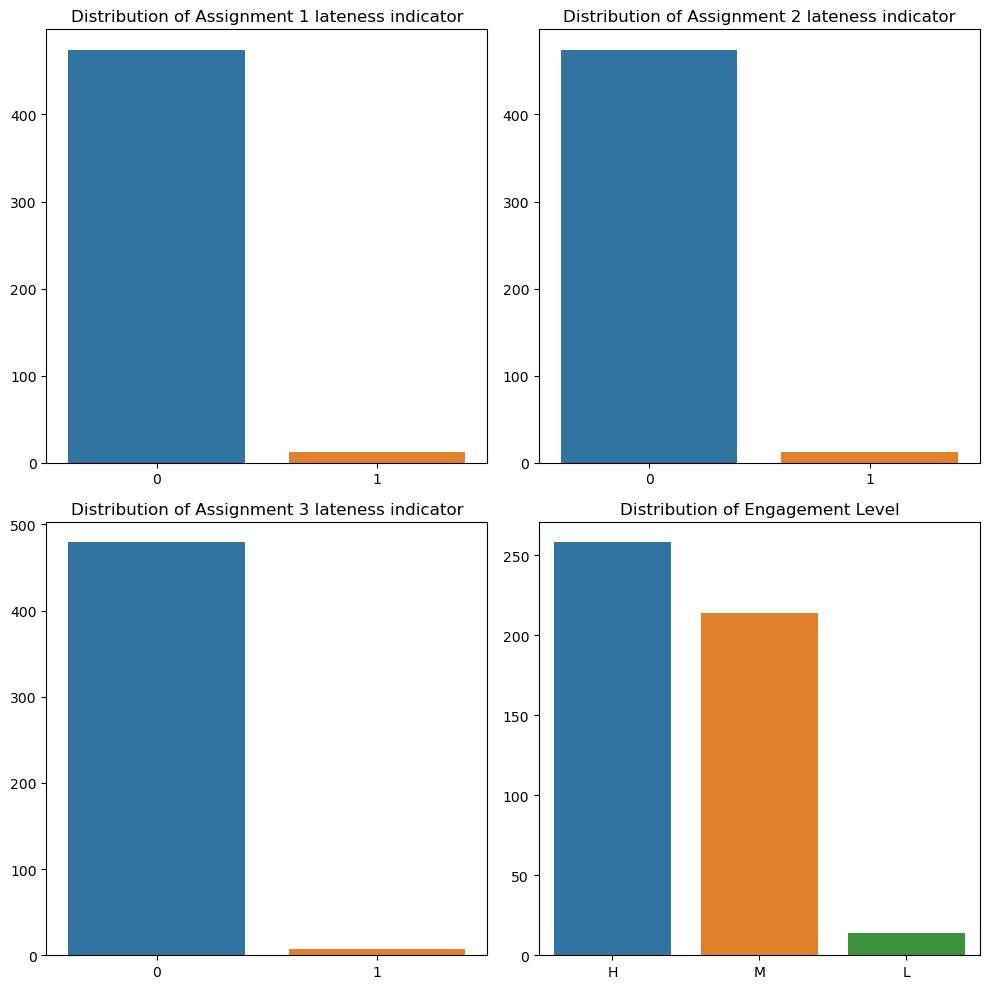

In [10]:
# Distribution of categorical features
categorical_features = ['Assignment 1 lateness indicator', 'Assignment 2 lateness indicator', 'Assignment 3 lateness indicator', 
                        'Engagement Level']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
axes = axes.flatten()
for i, feature in enumerate(categorical_features):
    sns.countplot(data=merged_df, x=feature, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

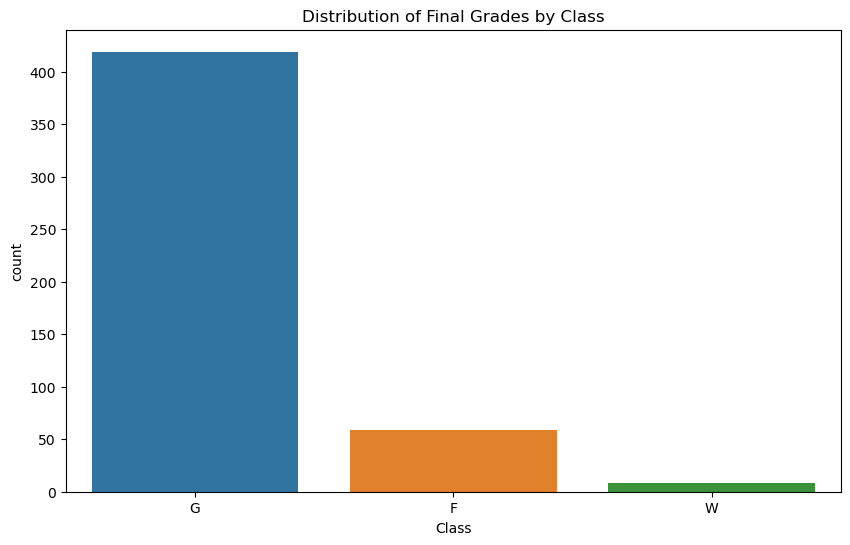

In [11]:
# Distribution of final letter grades
plt.figure(figsize=(10, 6))
sns.countplot(x='Class', data=merged_df)
plt.title('Distribution of Final Letter Grades')
plt.show()

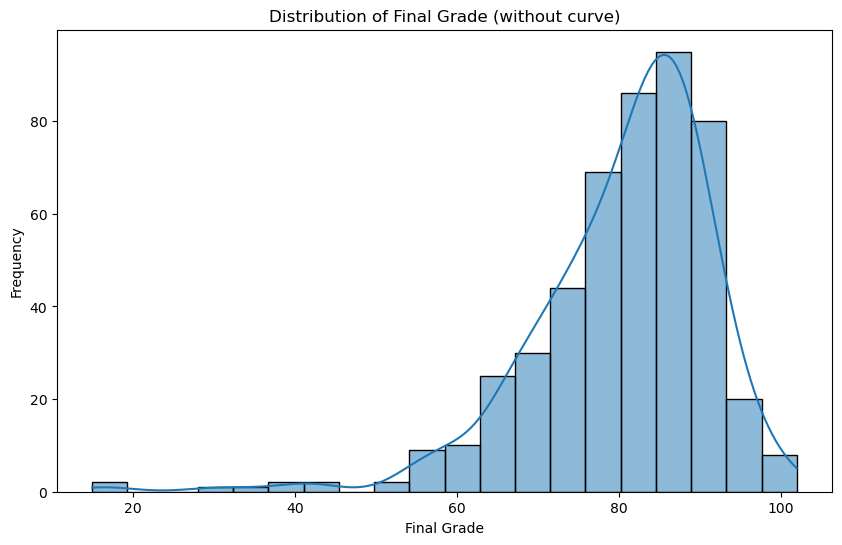

In [12]:
# Final Grades distribution
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['Total [100]'], bins=20, kde=True)
plt.title('Distribution of Final Grade (without curve)')
plt.xlabel('Final Grade')
plt.ylabel('Frequency')
plt.show()

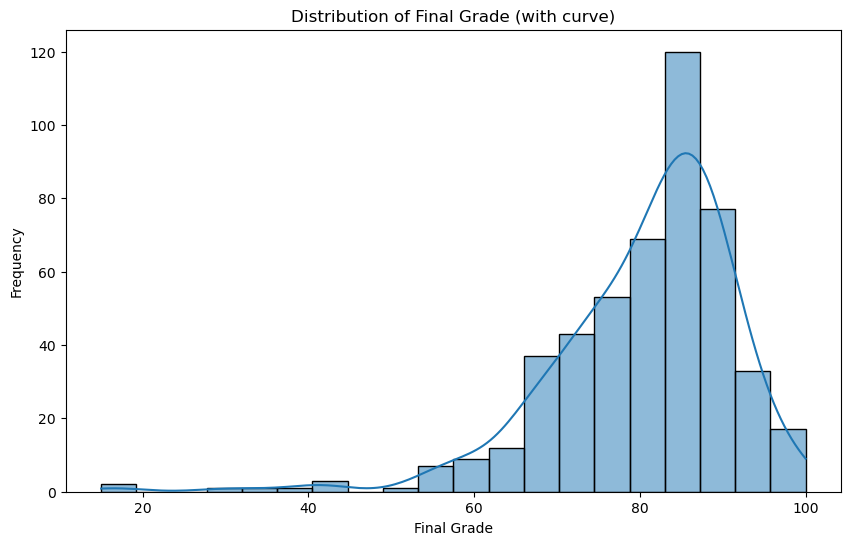

In [13]:
# Final Grades distribution
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['Course Grade'], bins=20, kde=True)
plt.title('Distribution of Final Grade (with curve)')
plt.xlabel('Final Grade')
plt.ylabel('Frequency')
plt.show()

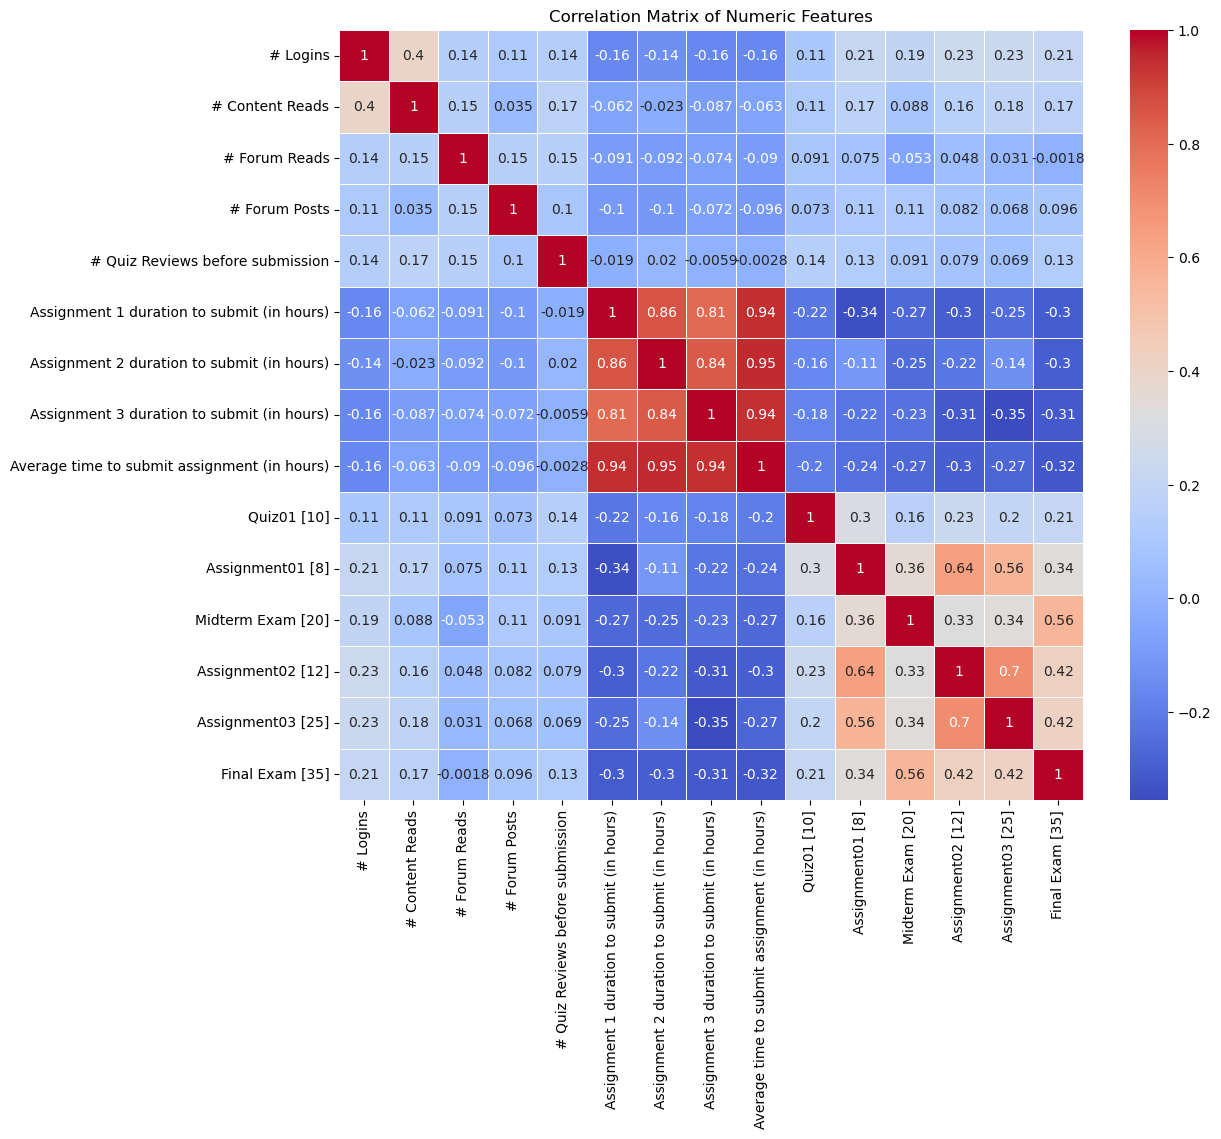

In [14]:
# Correlation matrix for numerical features
plt.figure(figsize=(12, 10))
correlation_matrix = merged_df[numeric_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

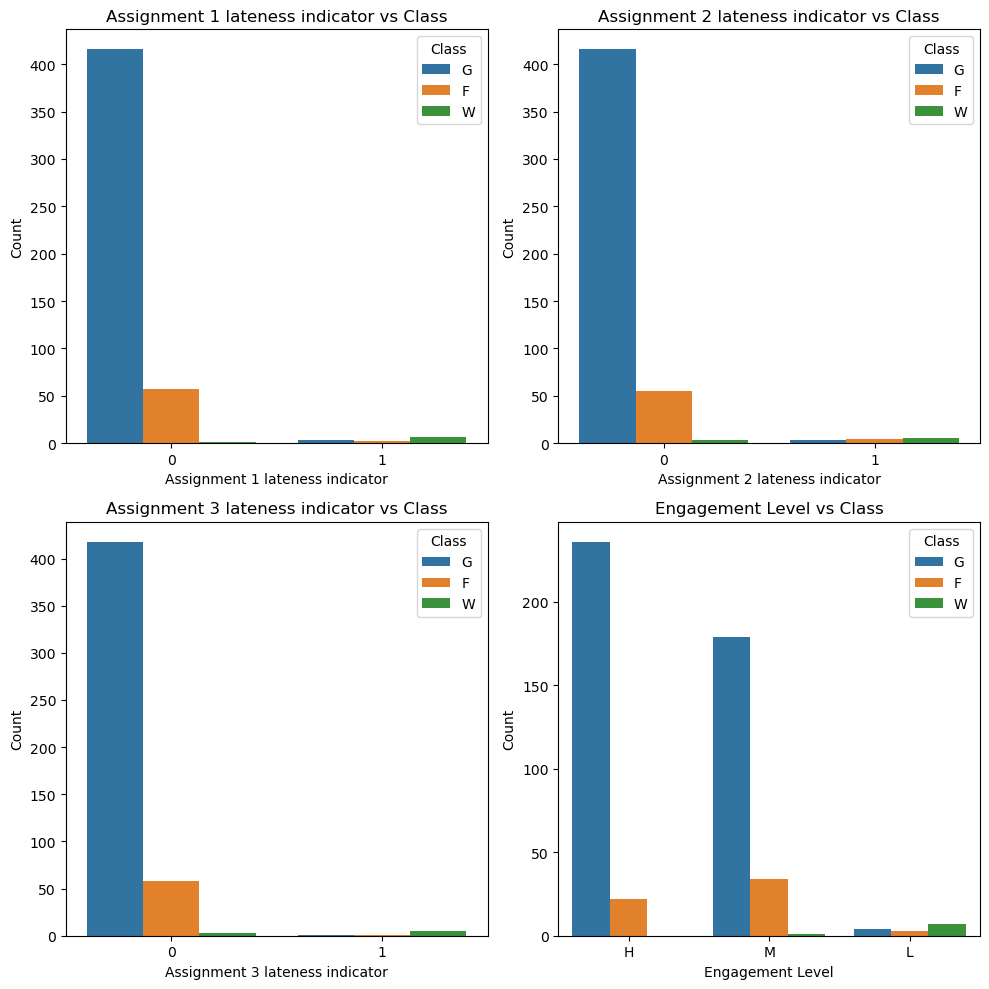

In [20]:
# Count plots for final letter grade by categorical features
plt.figure(figsize=(10, 10))

for i, feature in enumerate(categorical_features):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=feature, hue='Class', data=merged_df)
    plt.title(f'{feature} vs Class')
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

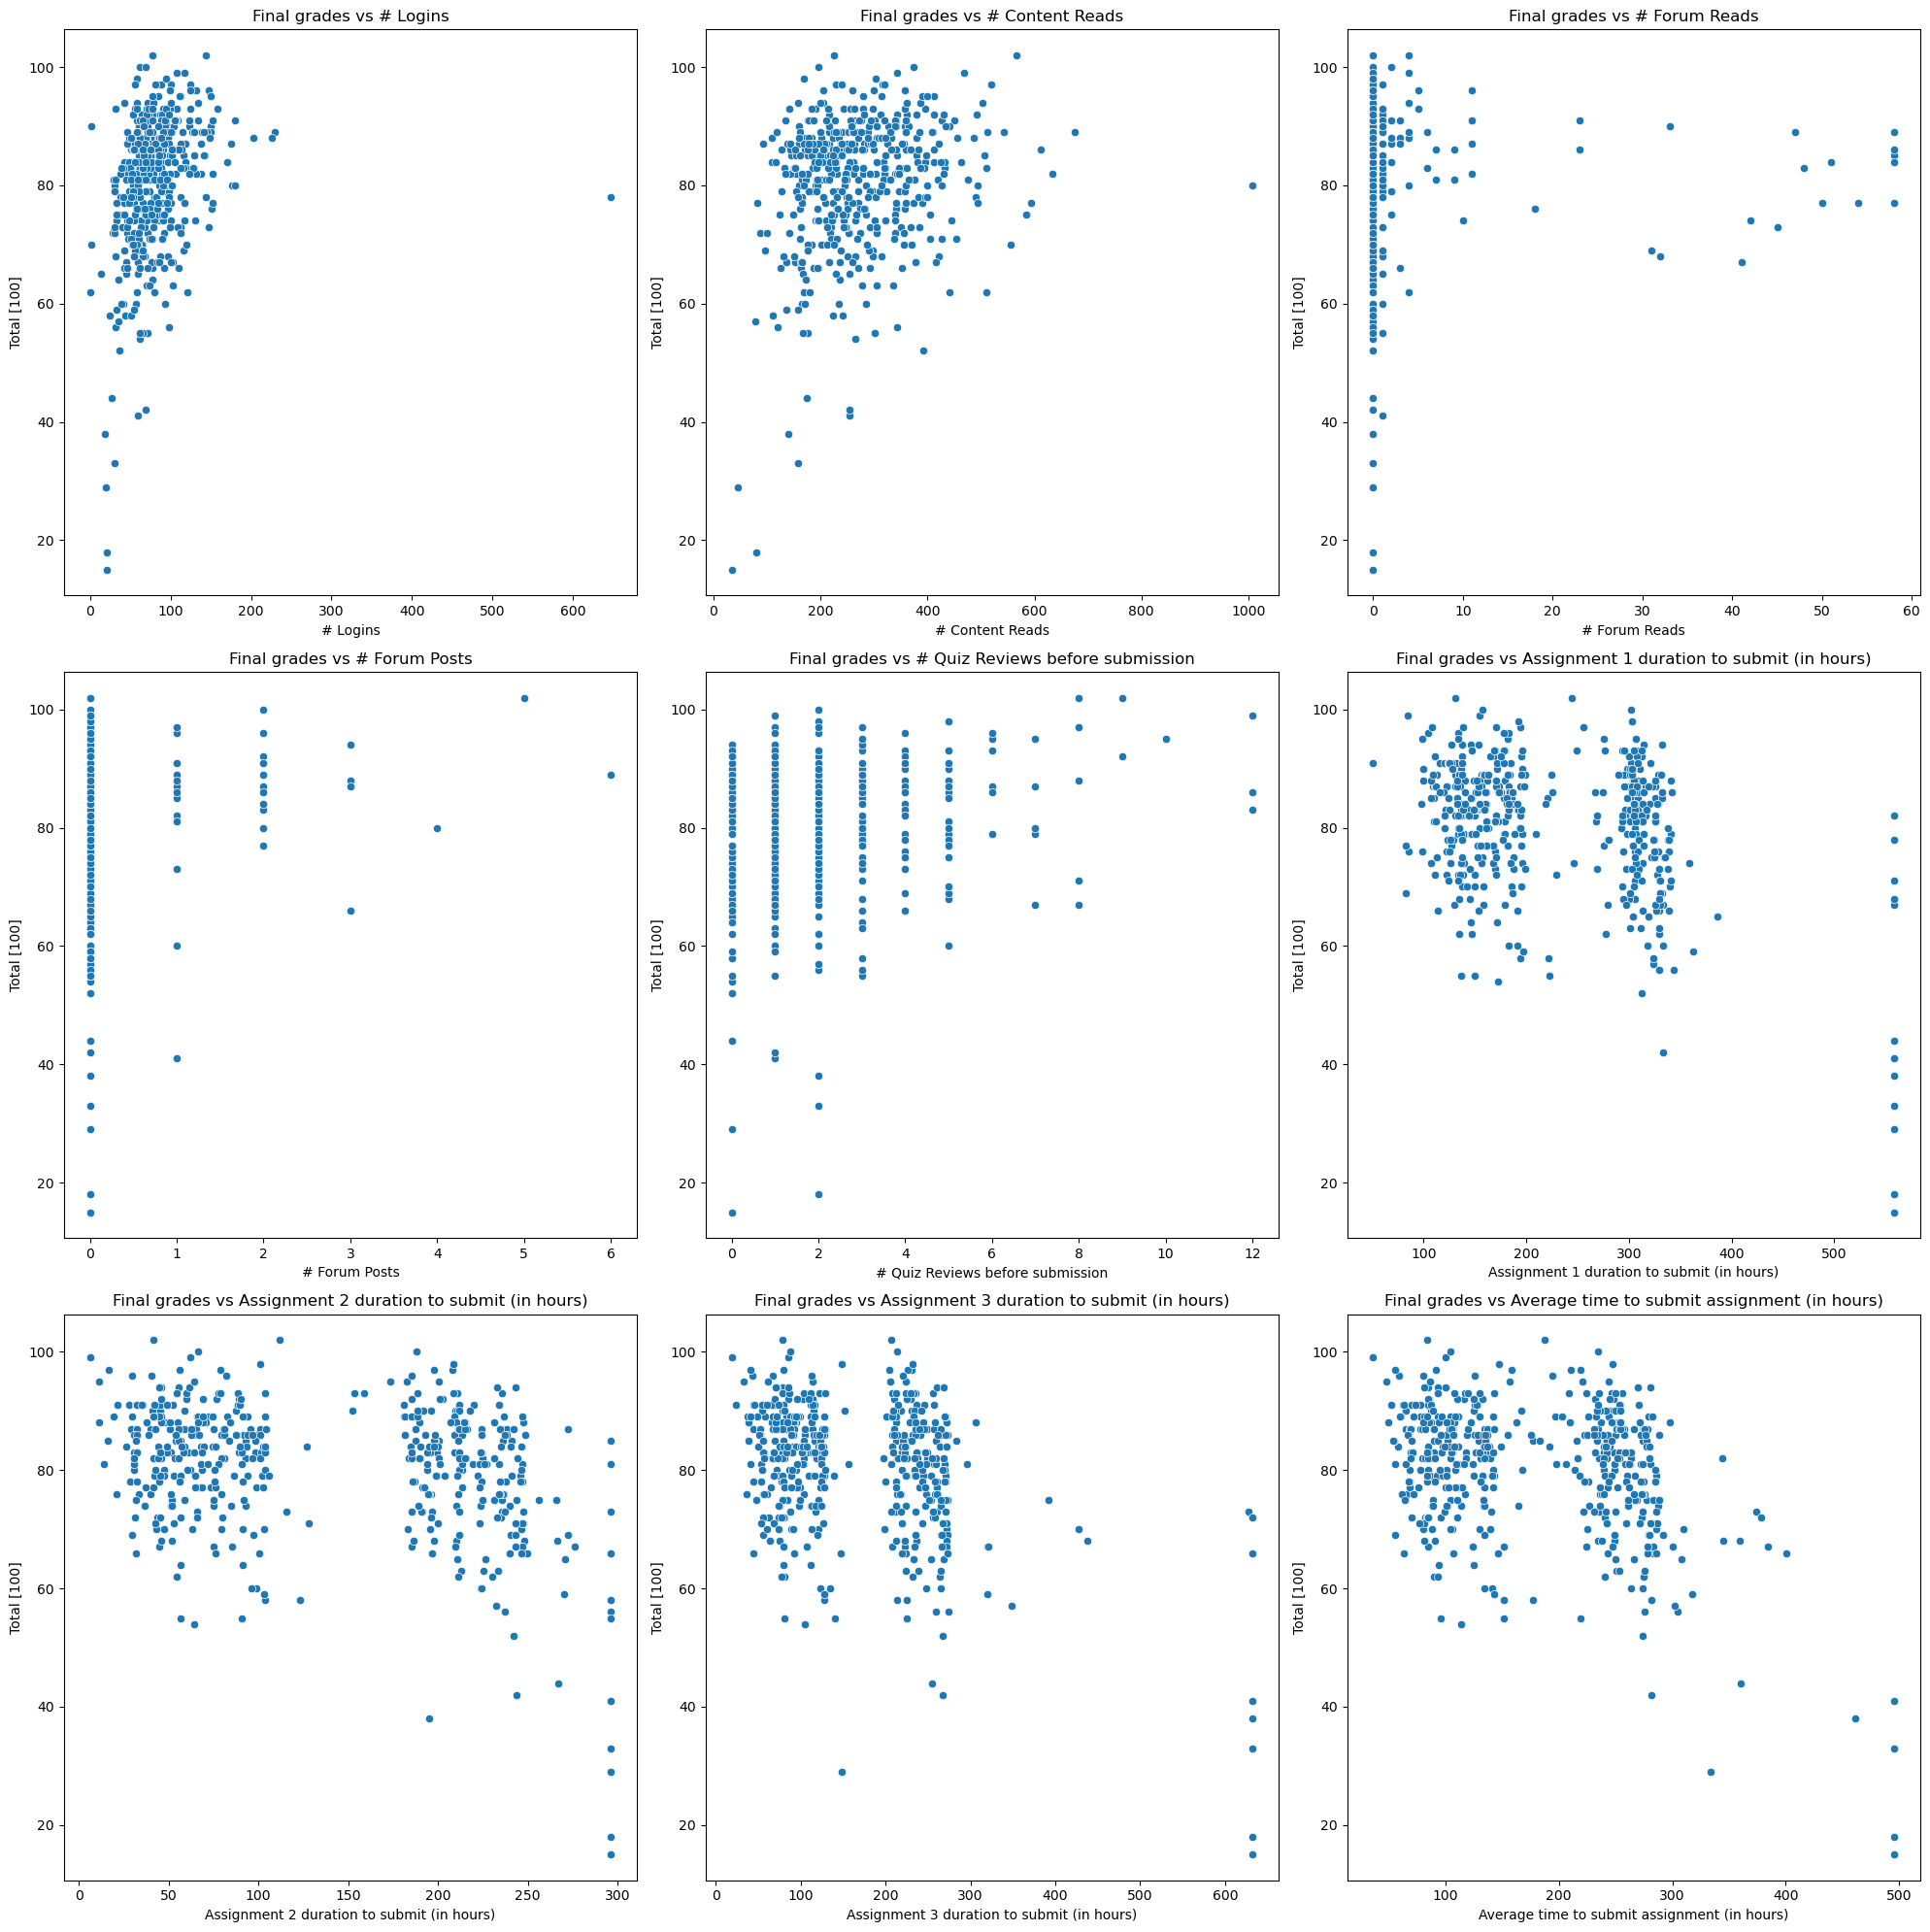

In [24]:
# Scatter plots to show relationships between final grades and other numerical variables
engagement_metrics = ['# Logins', '# Content Reads', '# Forum Reads', '# Forum Posts', '# Quiz Reviews before submission',
                      'Assignment 1 duration to submit (in hours)', 'Assignment 2 duration to submit (in hours)',
                      'Assignment 3 duration to submit (in hours)', 'Average time to submit assignment (in hours)']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 20))
axes = axes.flatten()
for i, feature in enumerate(engagement_metrics):
    sns.scatterplot(data=merged_df, x=feature, y='Total [100]', ax=axes[i])
    axes[i].set_title(f'Final grades vs {feature}')
plt.tight_layout()
plt.show()

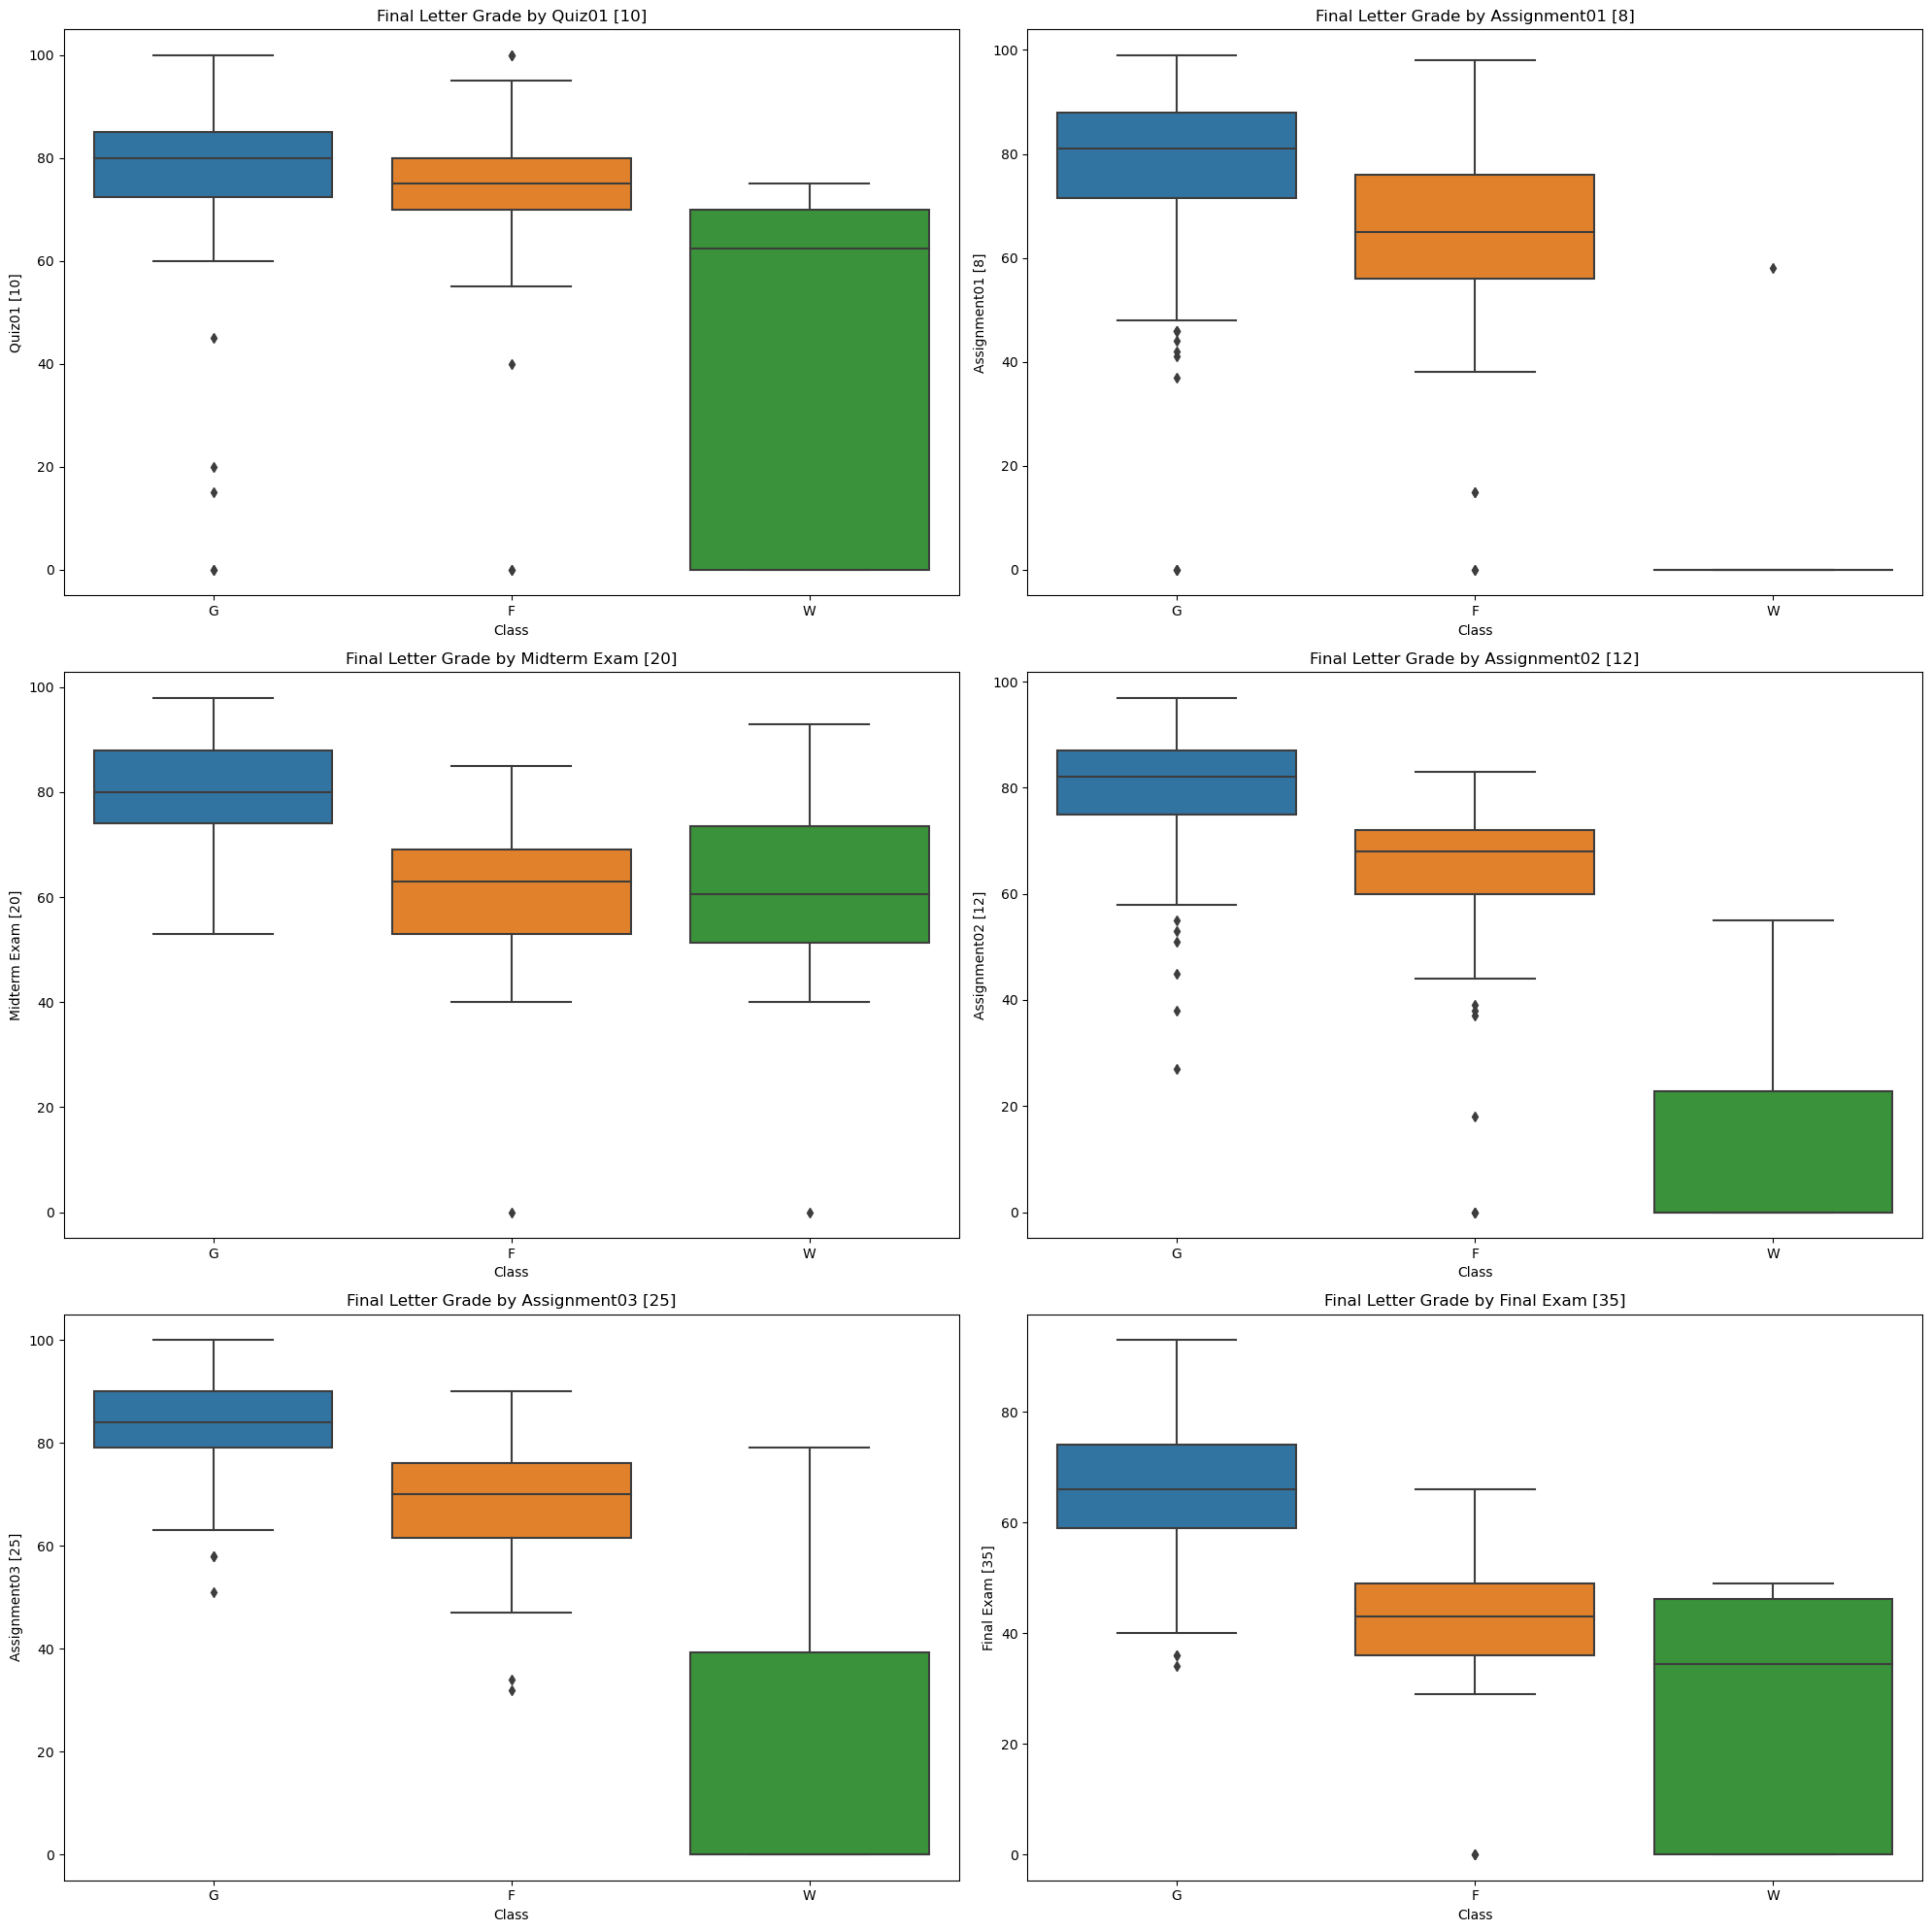

In [28]:
# Box plots for quiz / assignment scores against final letter grade
assignment_metrics = ['Quiz01 [10]', 'Assignment01 [8]', 'Midterm Exam [20]', 'Assignment02 [12]', 'Assignment03 [25]', 'Final Exam [35]']

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 20))
axes = axes.flatten()
for i, feature in enumerate(assignment_metrics):
    sns.boxplot(data=merged_df, x='Class', y=feature, ax=axes[i])
    axes[i].set_title(f'Final Letter Grade by {feature}')

plt.tight_layout()
plt.show()

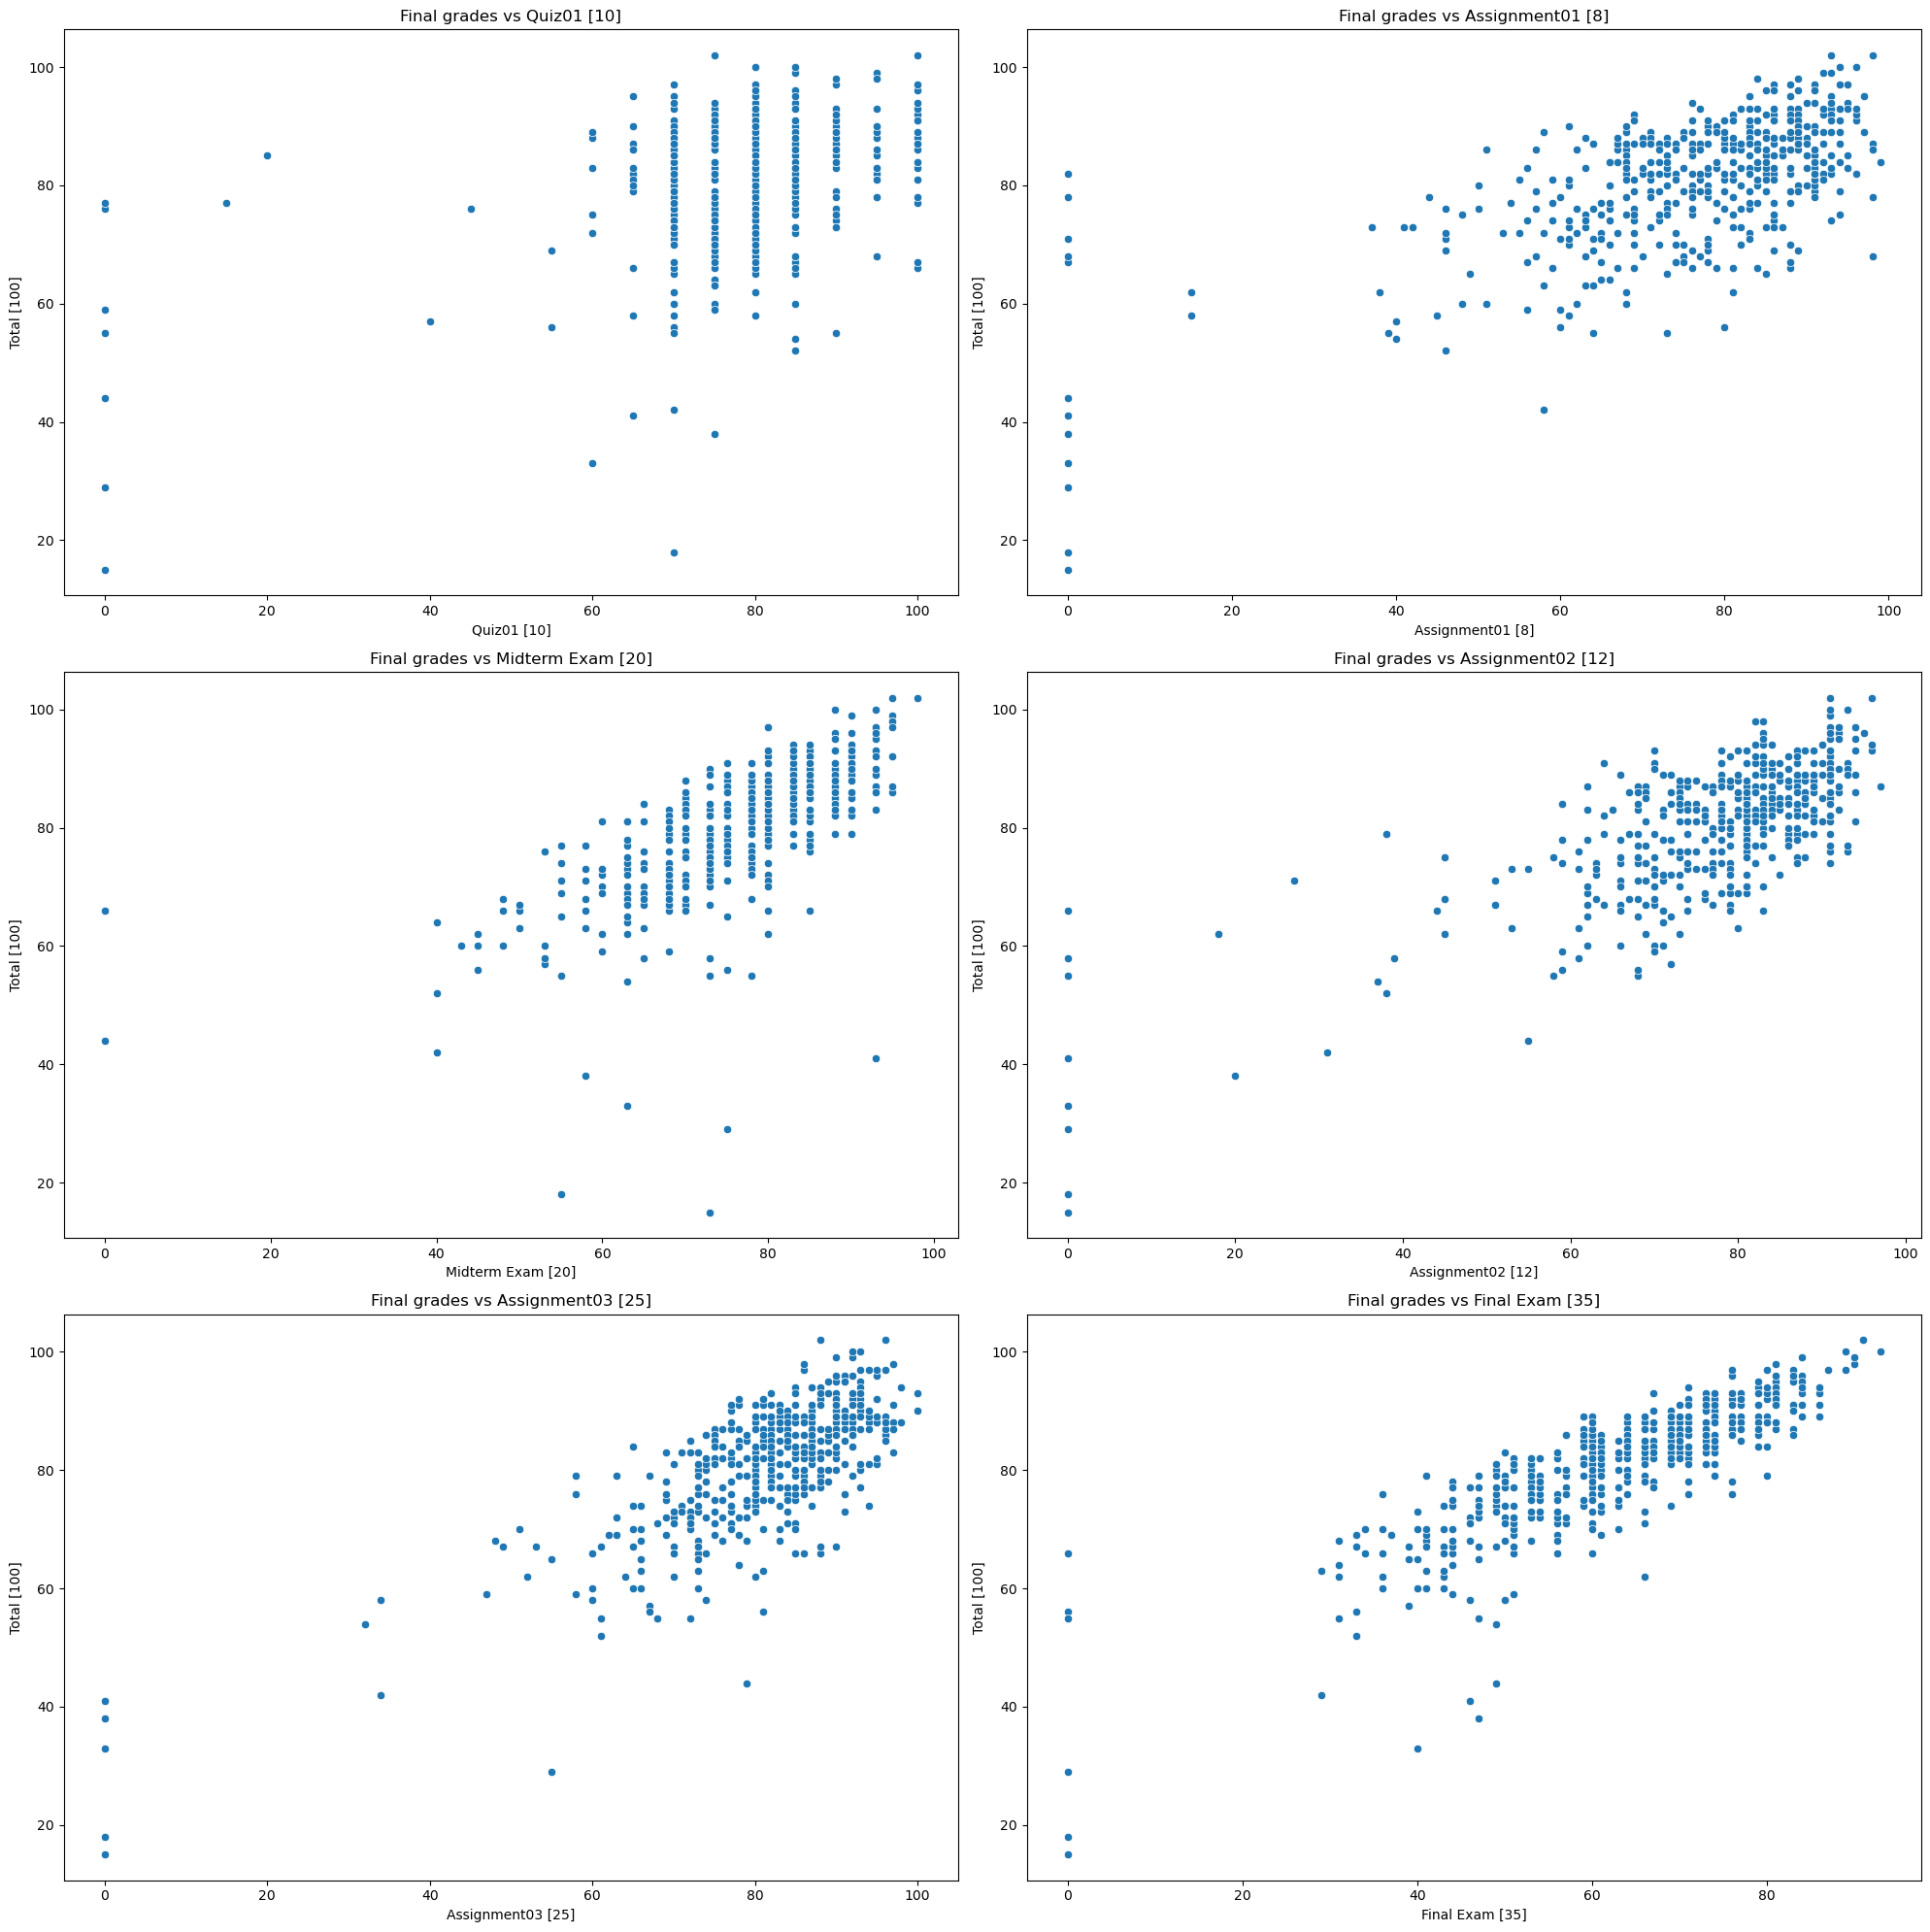

In [30]:
# Scatter plots to show relationships between final grades and the quiz / assignment grades
assignment_metrics = ['Quiz01 [10]', 'Assignment01 [8]', 'Midterm Exam [20]', 'Assignment02 [12]', 'Assignment03 [25]', 'Final Exam [35]']

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 20))
axes = axes.flatten()
for i, feature in enumerate(assignment_metrics):
    sns.scatterplot(data=merged_df, x=feature, y='Total [100]', ax=axes[i])
    axes[i].set_title(f'Final grades vs {feature}')
plt.tight_layout()
plt.show()

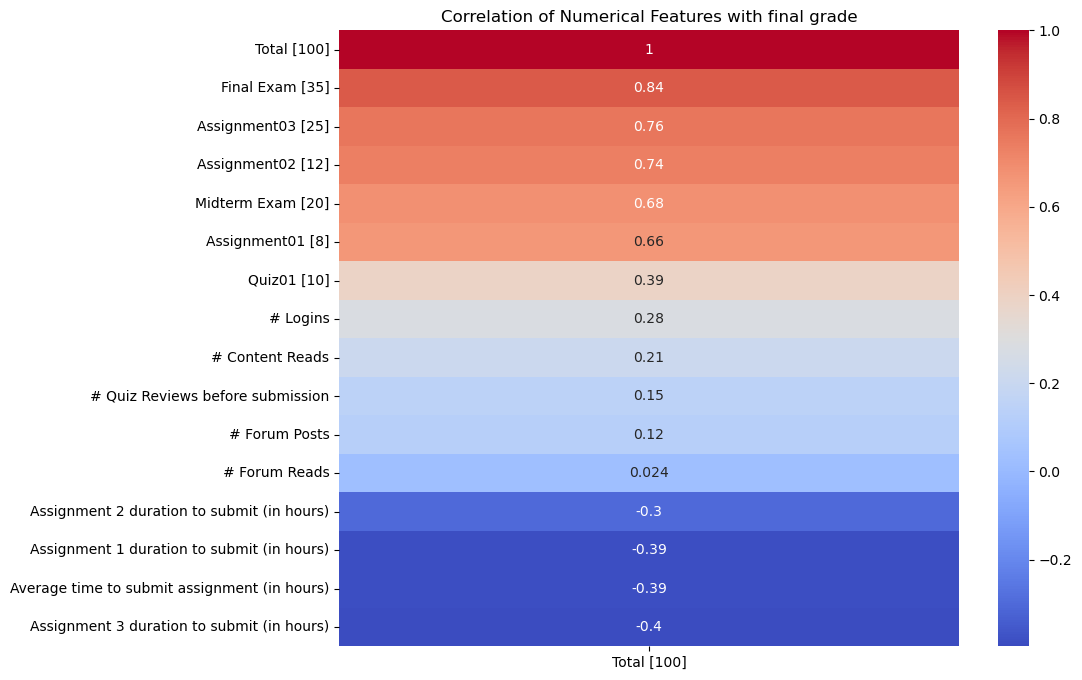

In [32]:
# Calculate correlation coefficients between final grade and other numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(merged_df[full_numeric].corr()[['Total [100]']].sort_values(by='Total [100]', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlation of Numerical Features with final grade')
plt.show()